In [2]:
%pip install TA-Lib


# %%
# นำเข้าไลบรารีที่จำเป็น
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# อ่านข้อมูลจาก Excel แทน yfinance
file_path = 'Agriculture and food industry_5y_data.xlsx'  # 🔁 เปลี่ยนชื่อไฟล์ตามของจริง
df = pd.read_excel(file_path)

# ตรวจสอบว่าคอลัมน์ 'Date' อยู่ใน index หรือเปล่า
if df.index.name == 'Date':
    df = df.reset_index()

# กรองคอลัมน์ให้มีเฉพาะที่ต้องการ (ถ้ามีมากกว่านี้ในไฟล์)
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

# แปลงคอลัมน์ Date ให้อยู่ในรูป datetime (ถ้ายังไม่ได้แปลง)
df['Date'] = pd.to_datetime(df['Date'])

# ดูตัวอย่างข้อมูล
print(df.head())


# %%
import pandas as pd
import talib as ta

# 1. อ่านข้อมูลจากทุกชีตในไฟล์ Excel
file_path = 'Agriculture and food industry_5y_data.xlsx'
sheets_dict = pd.read_excel(file_path, sheet_name=None)

period = 14
processed_dict = {}

def rsi_signal(rsi):
    if rsi >= 70:
        return "SELL"
    elif rsi <= 30:
        return "BUY"
    else:
        return ""

def signal_to_binary(signal):
    if signal == "BUY":
        return 1
    else:
        return 0

for sheet_name, df in sheets_dict.items():
    if df.index.name == 'Date':
        df = df.reset_index()

    df['Date'] = pd.to_datetime(df['Date'])
    df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

    df['EMA25'] = ta.EMA(df['Close'], timeperiod=25)
    df['EMA75'] = ta.EMA(df['Close'], timeperiod=75)
    df['EMA200'] = ta.EMA(df['Close'], timeperiod=200)
    df['RSI'] = ta.RSI(df['Close'], timeperiod=period)

    macd, macdsignal, macdhist = ta.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    df['MACD'] = macd
    df['MACD_signal'] = macdsignal
    df['MACD_hist'] = macdhist

    df['Change'] = df['Close'].diff()
    df['Gain'] = df['Change'].apply(lambda x: x if x > 0 else 0)
    df['Loss'] = df['Change'].apply(lambda x: -x if x < 0 else 0)

    df['Avg Gain'] = df['Gain'].rolling(window=period).mean()
    df['Avg Loss'] = df['Loss'].rolling(window=period).mean()

    df['RS'] = df.apply(lambda row: row['Avg Gain'] / row['Avg Loss'] if row['Avg Loss'] != 0 else 100, axis=1)

    df['RSI Signal'] = df['RSI'].apply(rsi_signal)

    # เพิ่มคอลัมน์ status แบบ binary target
    df['status'] = df['RSI Signal'].apply(signal_to_binary)

    processed_dict[sheet_name] = df

    # แสดงค่า unique ของ status ในแต่ละชีต
    print(f"Sheet: {sheet_name} — unique values in status: {df['status'].unique()}")

# Export ทุกชีตกลับไปยัง Excel
#output_path = 'หุ้น_processed.xlsx'
#with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
    #for sheet, df in processed_dict.items():
       # df.to_excel(writer, sheet_name=sheet, index=False)





Note: you may need to restart the kernel to use updated packages.
        Date      Open      High       Low     Close     Volume
0 2022-11-01  6.584078  7.500848  6.084021  7.417505  932827900
1 2022-11-02  7.084134  7.459176  6.417392  6.542406  410476300
2 2022-11-03  6.542406  6.917449  6.417392  6.834106  145654900
3 2022-11-04  6.792434  7.000791  6.500735  6.542406  119765500
4 2022-11-07  6.625749  6.625749  6.125693  6.167364   88102200
Sheet: AAI.bk — unique values in status: [0 1]
Sheet: APURE.bk — unique values in status: [0 1]
Sheet: ASIAN.bk — unique values in status: [0 1]
Sheet: BR.bk — unique values in status: [0 1]
Sheet: BRR.bk — unique values in status: [0 1]
Sheet: BTG.bk — unique values in status: [0 1]
Sheet: CBG.bk — unique values in status: [0 1]
Sheet: CFRESH.bk — unique values in status: [0 1]
Sheet: CH.bk — unique values in status: [0 1]
Sheet: CHAO.bk — unique values in status: [0 1]
Sheet: CHOTI.bk — unique values in status: [0 1]
Sheet: CM.bk — unique val

In [7]:
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt
import seaborn as sns

# อ่านข้อมูลจาก Excel
file_path = 'หุ้น_processed.xlsx'

def read_excel_file(file_path):
    df = pd.read_excel(file_path)
    return df

#df = read_excel_file(file_path)

In [8]:
file_path

'หุ้น_processed.xlsx'

In [9]:
df

,Date,Open,High,Low,Close,Volume,EMA25,EMA75,EMA200,RSI,...,MACD_signal,MACD_hist,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI Signal,status
0,2020-06-15,8.531926,8.755274,8.353247,8.353247,739400,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.00000,NaN,NaN,NaN,,0
1,2020-06-16,8.531927,8.665936,8.442587,8.442587,379800,NaN,NaN,NaN,NaN,...,NaN,NaN,0.089340,0.089340,0.00000,NaN,NaN,NaN,,0
2,2020-06-17,8.442586,8.665934,8.442586,8.621264,213700,NaN,NaN,NaN,NaN,...,NaN,NaN,0.178678,0.178678,0.00000,NaN,NaN,NaN,,0
3,2020-06-18,8.665936,8.755275,8.531927,8.665936,242200,NaN,NaN,NaN,NaN,...,NaN,NaN,0.044671,0.044671,0.00000,NaN,NaN,NaN,,0
4,2020-06-19,8.621264,8.710604,8.531925,8.531925,146300,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.134010,0.000000,0.13401,NaN,NaN,NaN,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,2025-06-09,5.250000,5.300000,5.250000,5.300000,608700,5.649302,6.046084,6.569287,35.047583,...,-0.190911,-0.008817,0.000000,0.000000,0.00000,0.032143,0.078571,0.409091,,0
1204,2025-06-10,5.300000,5.300000,5.200000,5.250000,14600,5.618587,6.025134,6.556159,33.698479,...,-0.193095,-0.008736,-0.050000,0.000000,0.05000,0.025000,0.082143,0.304348,,0
1205,2025-06-11,5.200000,5.250000,5.200000,5.250000,1600,5.590234,6.004736,6.543163,33.698479,...,-0.194712,-0.006466,0.000000,0.000000,0.00000,0.025000,0.053571,0.466667,,0
1206,2025-06-12,5.200000,5.350000,5.150000,5.200000,50200,5.560216,5.983559,6.529798,32.258358,...,-0.196242,-0.006121,-0.050000,0.000000,0.05000,0.025000,0.053571,0.466667,,0


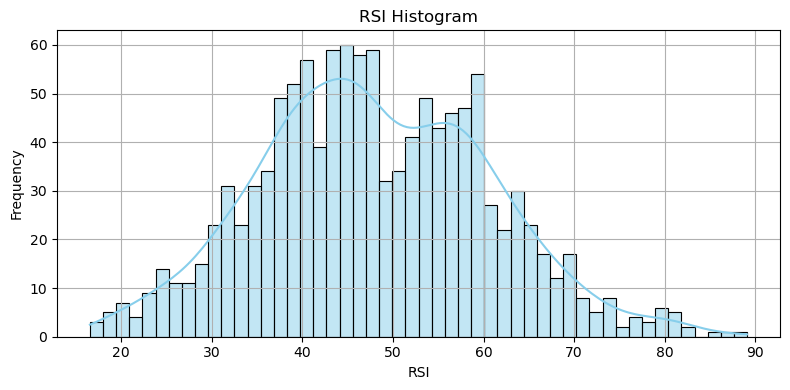

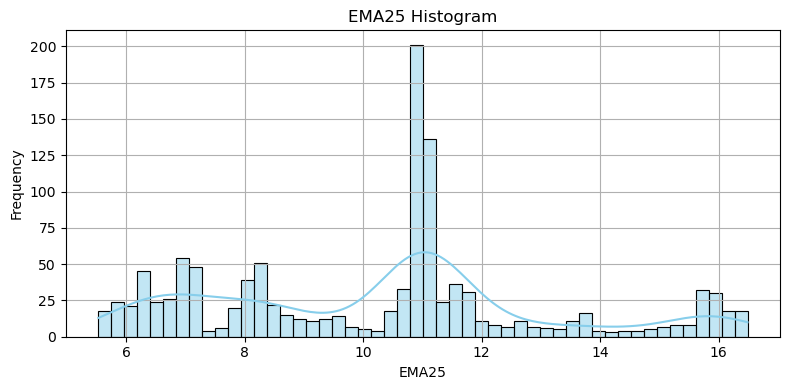

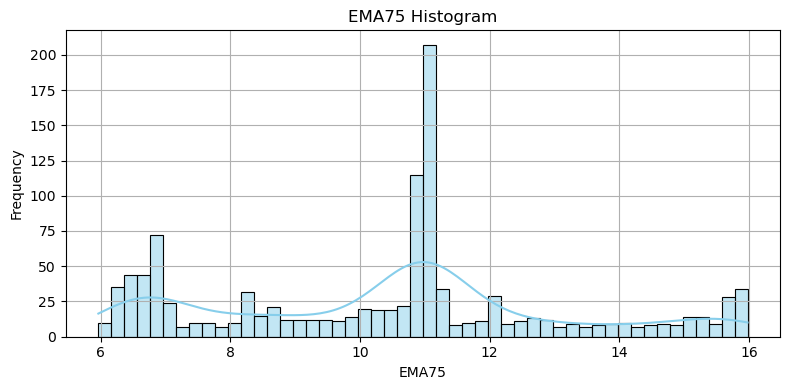

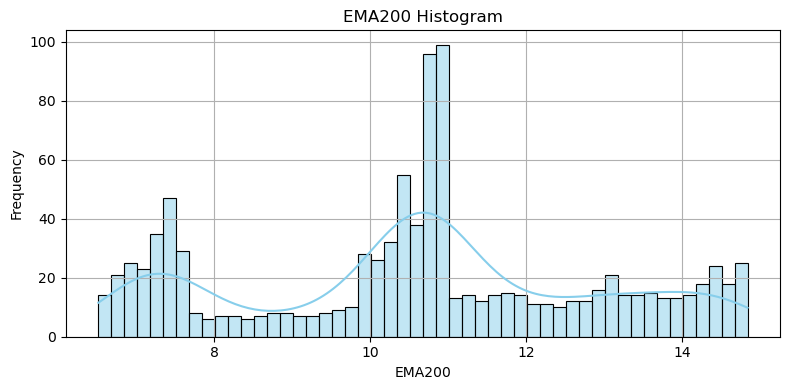

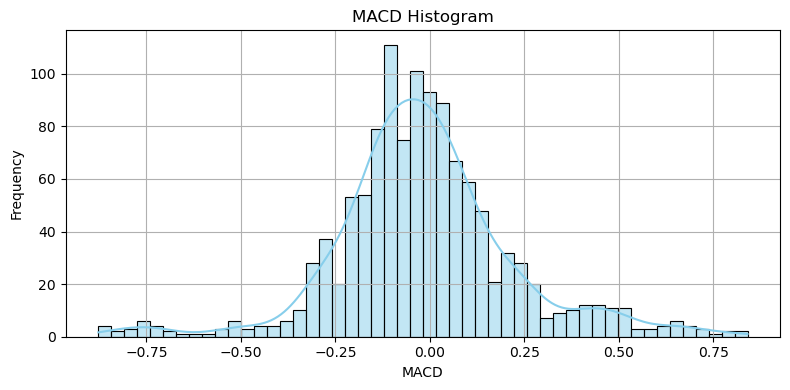

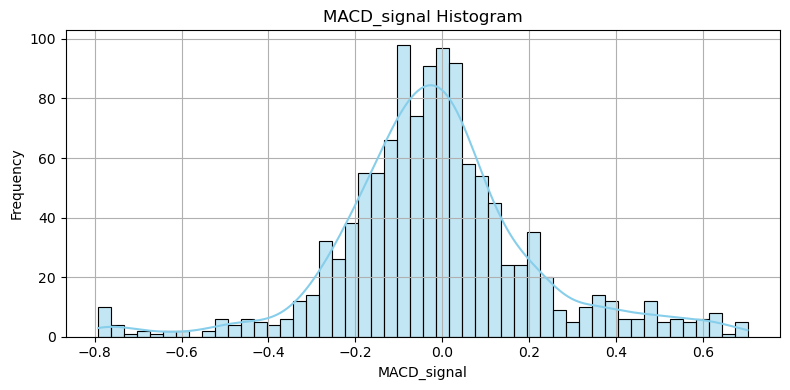

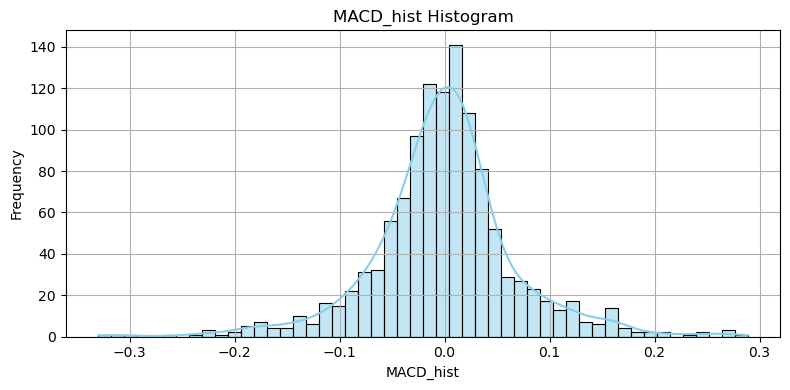

In [10]:

# สร้าง Histogram สำหรับแต่ละอินดิเคเตอร์
indicators = ['RSI', 'EMA25', 'EMA75', 'EMA200', 'MACD', 'MACD_signal', 'MACD_hist']

for indicator in indicators:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[indicator].dropna(), bins=50, kde=True, color='skyblue')
    plt.title(f'{indicator} Histogram')
    plt.xlabel(indicator)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

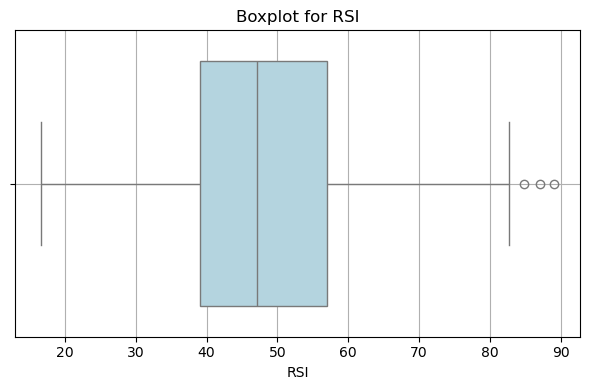

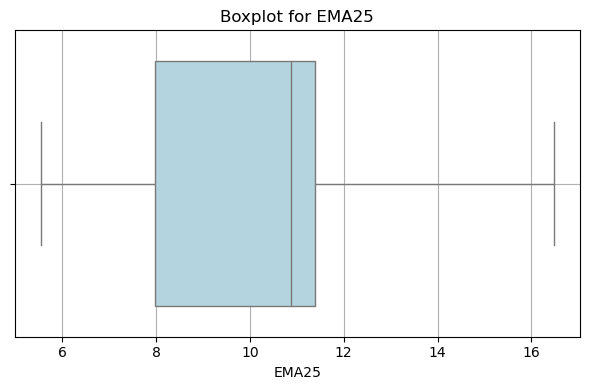

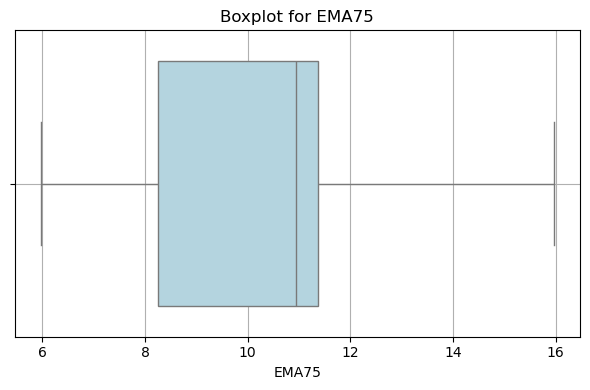

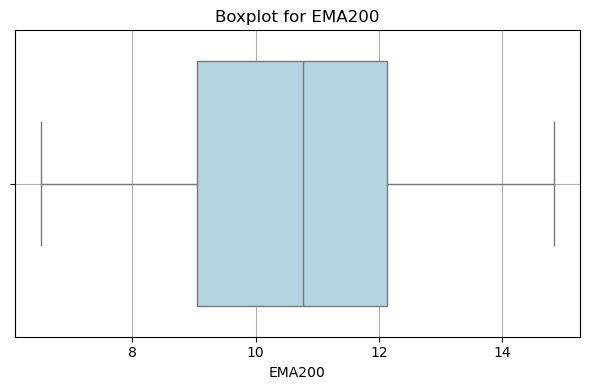

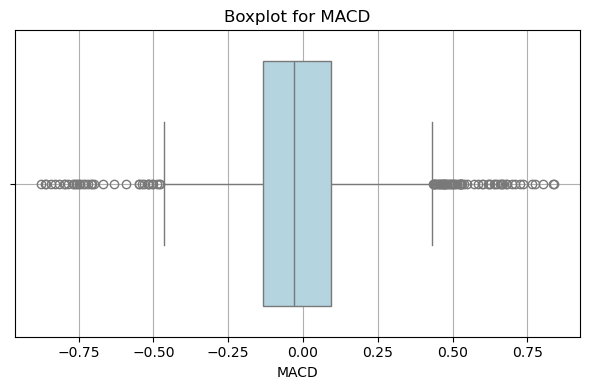

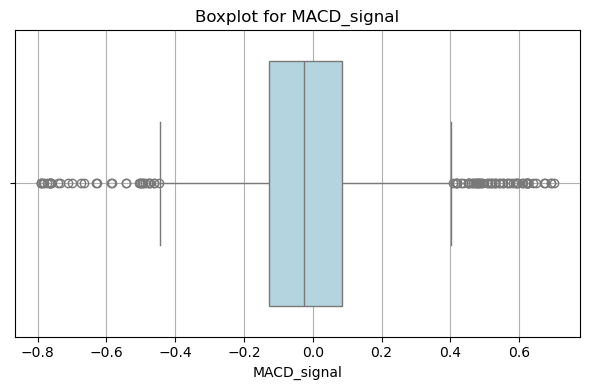

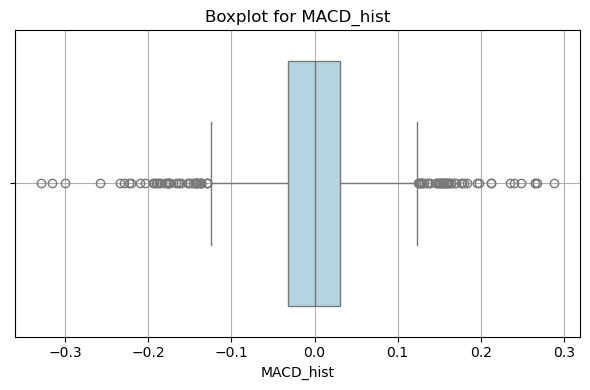

In [11]:
# เลือก Indicator ที่ต้องการตรวจสอบ
indicators = ['RSI', 'EMA25', 'EMA75', 'EMA200', 'MACD', 'MACD_signal', 'MACD_hist']

# สร้าง Boxplot สำหรับแต่ละ Indicator
for indicator in indicators:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[indicator], color='lightblue')
    plt.title(f'Boxplot for {indicator}')
    plt.xlabel(indicator)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [12]:
def detect_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return series[(series < lower_bound) | (series > upper_bound)]

outliers_rsi = detect_outliers(df['RSI'])
print("RSI Outliers:")
print(outliers_rsi)


RSI Outliers:
521     87.048362
522     89.083772
1028    84.810265
Name: RSI, dtype: float64


In [13]:
# แสดงข้อมูลแถวที่ RSI เป็น outlier
df.loc[372]


Date           2021-12-30 00:00:00
Open                     10.984371
High                     11.170547
Low                      10.798195
Close                    11.170547
Volume                        4400
EMA25                    11.065823
EMA75                    11.029849
EMA200                   10.769791
RSI                      53.969377
MACD                      0.033507
MACD_signal                0.01728
MACD_hist                 0.016227
Change                         0.0
Gain                           0.0
Loss                           0.0
Avg Gain                  0.053193
Avg Loss                  0.053193
RS                             1.0
RSI Signal                        
status                           0
Name: 372, dtype: object

In [14]:
import pandas as pd

# สมมติ df คือ DataFrame ของคุณ

indicators = ['RSI', 'MACD', 'EMA25']  # ใส่ชื่อ Indicator ที่ต้องการตรวจสอบ

outlier_summary = pd.DataFrame()  # ตารางสรุป

for ind in indicators:
    Q1 = df[ind].quantile(0.25)
    Q3 = df[ind].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # เลือกข้อมูลที่เป็น outlier ของ Indicator นี้
    outliers = df[(df[ind] < lower_bound) | (df[ind] > upper_bound)].copy()
    outliers['Indicator'] = ind  # เพิ่มคอลัมน์ชื่อ Indicator เพื่อบอกว่าอันนี้คือ outlier ของตัวไหน
    
    # เลือกคอลัมน์สำคัญที่จะเก็บไว้ (แก้ตามความเหมาะสม)
    cols = ['Date', 'Open', 'High', 'Low', 'Close', ind, 'Indicator']
    outliers = outliers[cols]
    
    # รวมข้อมูล outlier ทุก indicator เข้าด้วยกัน
    outlier_summary = pd.concat([outlier_summary, outliers])

# แสดงผลตารางสรุป outlier ของทุก Indicator
print(outlier_summary)


           Date       Open       High        Low      Close        RSI  \
521  2022-08-17  12.380689  13.218480  12.380689  13.218480  87.048362   
522  2022-08-18  12.939216  13.683919  12.846128  13.683919  89.083772   
1028 2024-09-16   7.055906   7.591181   7.055906   7.591181  84.810265   
103  2020-11-17  10.228384  10.685009  10.137060  10.593684        NaN   
104  2020-11-18  10.867658  11.872231  10.502359  11.689582        NaN   
...         ...        ...        ...        ...        ...        ...   
817  2023-11-01   9.165489   9.588511   9.165489   9.400501        NaN   
818  2023-11-02   9.400500   9.494505   9.259493   9.306495        NaN   
1032 2024-09-20   7.445197   7.493858   7.396535   7.493858        NaN   
1033 2024-09-23   7.493858   7.639842   7.493858   7.542520        NaN   
1034 2024-09-24   7.542520   7.542520   7.493858   7.542520        NaN   

     Indicator      MACD  EMA25  
521        RSI       NaN    NaN  
522        RSI       NaN    NaN  
1028     